## Reconocimiento de Patrones en Imágenes - Tarea 2  
Profesor: Miguel Carrasco  
Alumno: Cristopher Lincoleo  
17-08-2023

### 1. Librerias necesarias

In [1]:
#Librerias necesarias

#Tratamiento de imágenes
import cv2
from skimage.feature import graycomatrix, graycoprops
from sklearn import preprocessing
from skimage.io import imread_collection

#Matemáticas
from math import radians
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt

#Modelo LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 2. Carga de datos y generación de dataframe de descriptores

La siguiente función realiza lo siguiente:

Posteriormente procesa las imágenes: 
1. Recorre las imágenes en el directorio especificado
2. Convierte las imágenes en escala de grises
3. Escala según el nivel dado
4. Utiliza el algoritmo Graycomatrix para extraer los descriptores de cada imagen
5. Genera un dataframe con los descriptores de cada imagen y su clase
6. Retorna el dataframe

In [2]:
def load_data_with_names(level, features, clase, col_dir):
    """ 
    La función recibe:
    level: número de niveles al cual reducir el conjunto de pixeles
    features: lista con el conjunto de descriptores de la imagen
    clase: arreglo que contiene las clases a las que pertenece cada imagen
    col_dir: directorio donde se alojan las imágenes, se facilita disponer todas las 
    imágenes en el mismo directorio y llamar a todas según su extensión, ejemplo: './directorio/*.jpg(o .tif o .png) 
    
    Posteriormente procesa las imágenes: 
    1. Convierte en escala de grises
    2. Escala según el nivel dado
    3. Utiliza el algoritmo Graycomatrix para extraer los descriptores de cada imagen
    4. Genera un dataframe con los descriptores de cada imagen y su clase
    5. Retorna el dataframe
     """

    # Definir las características que deseas calcular
    features = features

    # Definir las clases del dataframe
    clase = clase

    # directorio donde se alojan las imágenes, se debe especificar el formato
    col_dir = col_dir
    
    col = imread_collection(col_dir)  #coleccion de imágenes
    col_files = col.files

    # vamos a almacenar en la matriz F todos los descriptores
    F = []
    #image_names = []  # Lista para almacenar los nombres de archivo

    # >> recorremos la lista de archivos 
    
    for i,filename in enumerate(col_files):
        # lectura de la imagen
        img = cv2.imread(filename)
        
        # convertimos la imagen a escala de grises
        gray =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Escalamos los datos en una matriz con menos valores
        new_scale = (0,level)
        new_gray = preprocessing.MinMaxScaler(new_scale).fit_transform(gray).astype(int)

        # --> algoritmo graycomatrix P01
        # numero de niveles de la imagenq
        l = np.max(new_gray)+1

        # extracción de caracteristicas a traves de graycomatrix
        P_1_0 = graycomatrix(new_gray, distances=[1], angles=[radians(90)], levels=l, symmetric=False, normed=True)
        texture_features = [graycoprops(P_1_0, ft).ravel()[0] for ft in features]
        #F.append((filename,) + tuple(texture_features))
        F.append(texture_features)   

    # >> FIN ciclo para cada imagen de textura

    # Crear un DataFrame de Pandas con los registros de textura
    #column_names = ['Nombre'] + features
    texture_df = pd.DataFrame(F, columns=features)
    texture_df['clase'] = clase

    return texture_df

In [3]:
level = 15 #valor arbitrario

features = ['contrast', 'energy', 'homogeneity', 'correlation', 'dissimilarity', 'ASM'] # Características buscadas

clase = np.array([1]*10+[2]*10+[3]*10) #Clases de imágenes en la carpeta textura 1: Banned, 2: striped, 3: zigzagged

col_dir = './texturas/*.jpg'

df = load_data_with_names(level, features, clase, col_dir)

df

,contrast,energy,homogeneity,correlation,dissimilarity,ASM,clase
0,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1
1,3.308565,0.134848,0.579312,0.874759,1.208134,0.018184,1
2,0.797184,0.166680,0.758221,0.976410,0.533842,0.027782,1
3,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1
4,1.130024,0.201756,0.814266,0.970389,0.474048,0.040705,1
5,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1
6,5.991956,0.211731,0.692581,0.678992,1.232822,0.044830,1
7,2.278672,0.587154,0.859399,0.952529,0.534610,0.344750,1
8,0.004069,0.993765,0.999907,0.998522,0.000591,0.987569,1
9,8.291574,0.100322,0.374497,0.584607,2.172354,0.010064,1


### 3. Análisis discriminante

In [4]:
X = df.drop('clase', axis =1)
y =df['clase']

In [5]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

Para tener una idea de cómo contribuyen los descriptores sobre los vetores propios discrimianntes, podemos observar los coeficientes de los componentes discriminates.  
De esta forma, se advierte que los descriptores que contribuyen más a la separación son los que en la matriz tienen los coeficientes más altos, en valor absoluto.  
Así, los descriptores ***2 (homogeneity)*** y ***4 (dissimilarity)*** son los más influyentes.

In [6]:
# Acceder a las componentes discriminantes
components = lda.coef_

print("Componentes discriminantes:")
print(components)

Componentes discriminantes:
[[  -9.60590355  -54.01509853  231.87807366  -11.53130238   98.44474887
    41.84799491]
 [   1.8756496     9.9233542   -66.11741392   -4.89630423  -28.06629784
   -10.19625119]
 [   7.73025395   44.09174433 -165.76065974   16.42760661  -70.37845104
   -31.65174371]]


Ploteamos la separacion con los 2 primeros discriminantes en el nuevo espacio creado

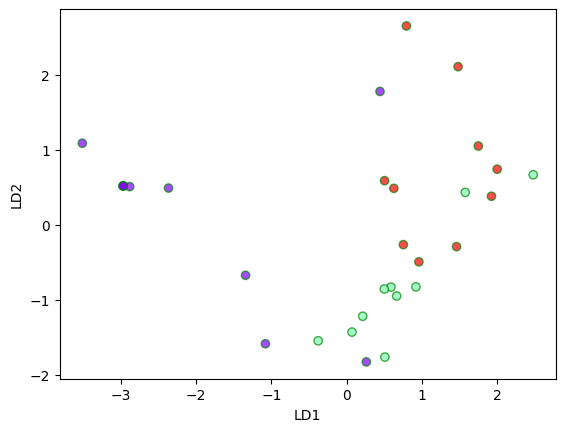

In [7]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='g'
)

### 4. Referencias  
https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2  
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html  
https://stackoverflow.com/questions/62610782/fishers-linear-discriminant-in-python